In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt
import stats as 

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [36]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [37]:
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [38]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
engine.execute('Select * From measurement Limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [45]:
#earliest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [47]:
# Calculate the date one year from the last date in data set.
from_one_year = dt.date(2010, 1, 1)-dt.timedelta(days = 365)
print("FromOneYear:", from_one_year)

FromOneYear: 2009-01-01


In [48]:
# Perform a query to retrieve the data and precipitation scores
column = inspector.get_columns('measurement')
for c in column:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [49]:
    
column = inspector.get_columns('station')
for c in column:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [50]:
prec_scores = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= from_one_year).\
                    group_by(Measurement.date).all()
prec_scores

[('2010-01-01', 0.15142857142857144),
 ('2010-01-02', 0.002857142857142857),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0014285714285714286),
 ('2010-01-05', 0.005),
 ('2010-01-06', 0.11600000000000002),
 ('2010-01-07', 0.27499999999999997),
 ('2010-01-08', 0.008571428571428572),
 ('2010-01-09', 0.002857142857142857),
 ('2010-01-10', 0.002857142857142857),
 ('2010-01-11', 0.12571428571428572),
 ('2010-01-12', 0.002857142857142857),
 ('2010-01-13', 0.0033333333333333335),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0014285714285714286),
 ('2010-01-21', 0.10833333333333334),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.0033333333333333335),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.03571428571428571),
 ('2010-01-27', 0.2285714285714286),
 ('2010-01-28', 0.12166666666666666),
 ('2010-01-29', 0.438),
 ('2010-01-30', 1.4700000000000002),
 ('2010-01-31', 0.36000000000000004),

In [51]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prec_df = pd.DataFrame(prec_scores, columns=['Date', 'Precipitation'])
prec_df.set_index('Date', inplace=True)
prec_df.head()
# Sort the dataframe by date

,Precipitation
Date,
2010-01-01,0.151429
2010-01-02,0.002857
2010-01-03,0.000000
2010-01-04,0.001429
2010-01-05,0.005000


NameError: name 'ticker' is not defined

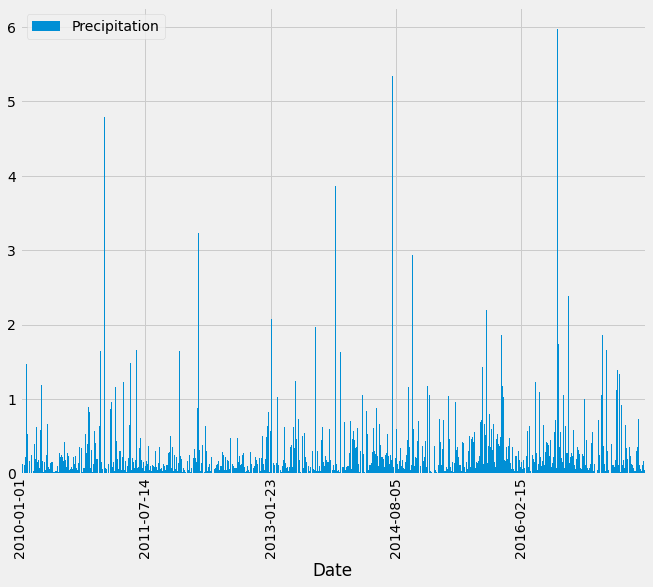

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prec_df.plot(kind= 'bar',width = 3, figsize =(10,8))
plt.locator_params(axis = 'x', nbins = 5)
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title("One Year Precipitation", size=18)
plt.ylabel("Precipitation (Inches)", size=16)
plt.xlabel("Date", size=16)
plt.savefig("Output/Precipitation.png")
plt.show


In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe(include='all')

,Precipitation
count,2792.000000
mean,0.161962
std,0.345704
min,0.000000
25%,0.010000
50%,0.058333
75%,0.173571
max,5.970000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()


9

In [80]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stat_cn = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
stat_cn

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()